In [12]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt
import plotly.graph_objects as go


Start = date.today() - timedelta(150)
Start.strftime("%Y-%m-%d")

End = date.today() + timedelta(2)
End.strftime("%Y-%m-%d")


def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,end=End))
    # Asset = pd.DataFrame(yf.download(ticker, period="3mo"))
    return Asset


### Target, Open, SL
stocks = {
    "NVDA": [179.46, 107.65, 114.92],
    "MSFT": [467.07, 414, 407.42],
    "AAPL": [290, 226.32, 211.62],
    "GOOG": [190.00, 161.18, 170.11],
    "AMD": [153.89, 139.9, 135.96],
    "AMZN": [2121.9, 192.9, 184.13],
    "ASML": [1100, 777.7, 746.8],
}

for k, v in stocks.items():
    # print(k, v)
    df = closing_price(k)
    df["SMA10"] = (df["Close"].apply(pd.to_numeric, errors="coerce").rolling(window=10).mean())
    df["SMA20"] = (df["Close"].apply(pd.to_numeric, errors="coerce").rolling(window=20).mean())
    df['Date'] = df.index
    df.to_csv(f"{k}.csv")

for k, v in stocks.items():

    df = pd.read_csv(f"{k}.csv")
    df["SMA10"] = (df["Close"].apply(pd.to_numeric, errors="coerce").rolling(window=10).mean())
    df["SMA20"] = (df["Close"].apply(pd.to_numeric, errors="coerce").rolling(window=20).mean())
    fig = go.Figure(
        data=[
            go.Candlestick(
                x=df["Price"],
                open=df["Open"],
                high=df["High"],
                low=df["Low"],
                close=df["Close"],
            ),
            go.Scatter(
                x=df["Price"],
                y=df["SMA10"],
                name="SMA10",
                line=dict(color="blue", width=3)
            ),
            go.Scatter(
                x=df["Price"],
                y=df["SMA20"],
                name="SMA20",
                line=dict(color="orange", width=3)
            )
        ]
    )

    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    fig.update_layout(
        xaxis_tickangle=90,
        width=1400,
        height=600,
        title=f"Stock Price - {k} (Generated: {current_time})",
        yaxis_title="Price",
        xaxis_title="Date",
    )

    fig.show()
    fig.write_image(f"/var/www/html/stocks/{k}_mo3.png")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
df['dtm'] = df.index
df.info()
df.to_csv("k.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2024-07-03 to 2024-11-29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Adj Close, ASML)  105 non-null    float64       
 1   (Close, ASML)      105 non-null    float64       
 2   (High, ASML)       105 non-null    float64       
 3   (Low, ASML)        105 non-null    float64       
 4   (Open, ASML)       105 non-null    float64       
 5   (Volume, ASML)     105 non-null    int64         
 6   (SMA10, )          96 non-null     float64       
 7   (SMA20, )          86 non-null     float64       
 8   (Date, )           105 non-null    datetime64[ns]
 9   (dtm, )            105 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(7), int64(1)
memory usage: 9.0 KB


In [6]:
import yfinance as yf
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Define the time period
end_date = datetime.now()
start_date = end_date - timedelta(days=30)  # Last 30 days of data

# Download the data (using AAPL as an example - you can change the ticker)
df = yf.download("AAPL", start=start_date, end=end_date, interval="1d")

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Price'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# Update the layout
fig.update_layout(
    title='Stock Price Chart',
    yaxis_title='Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Disable the range slider
)

# Display the chart
fig.show()
df.head()

[*********************100%***********************]  1 of 1 completed


KeyError: 'Price'

In [15]:
df.head()
# df['Ticker']

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-10-31,225.661728,225.910004,229.830002,225.369995,229.339996,64370100
2024-11-01,222.665024,222.910004,225.350006,220.270004,220.970001,65276700
2024-11-04,221.766006,222.009995,222.789993,219.710007,220.990005,44944500
2024-11-05,223.204422,223.449997,223.949997,221.139999,221.800003,28111300
2024-11-06,222.475235,222.720001,226.070007,221.190002,222.610001,54561100


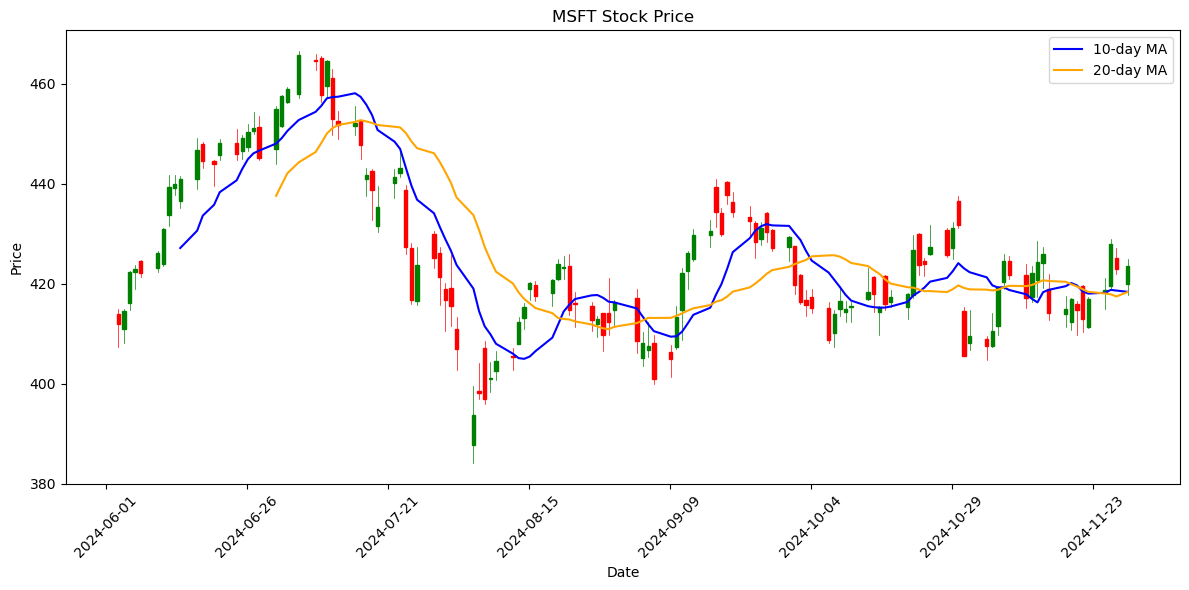

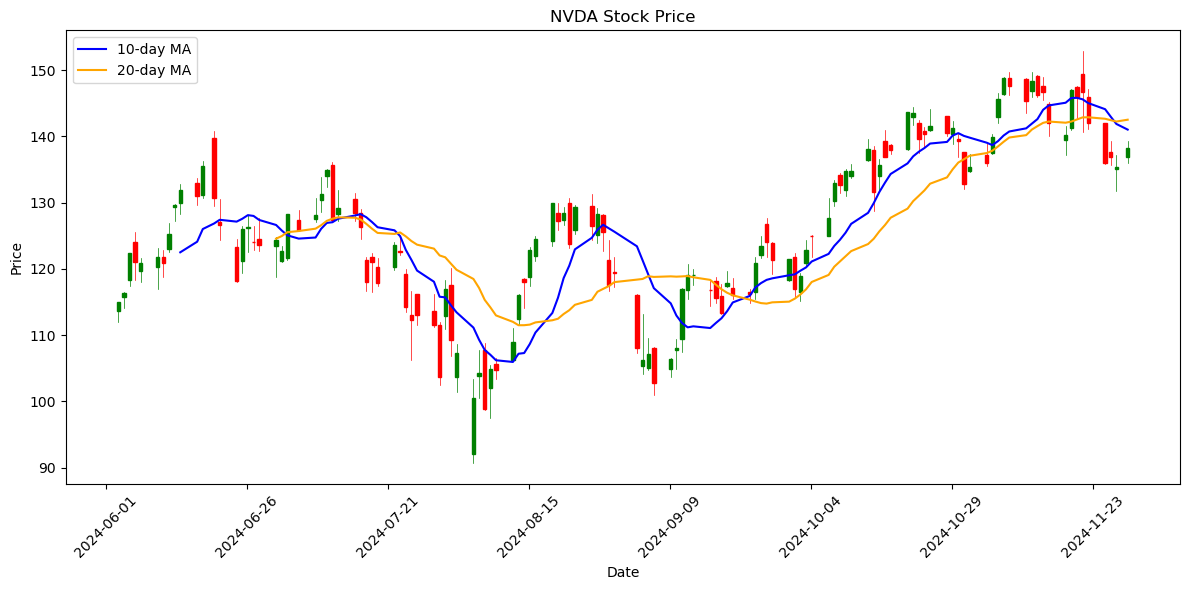

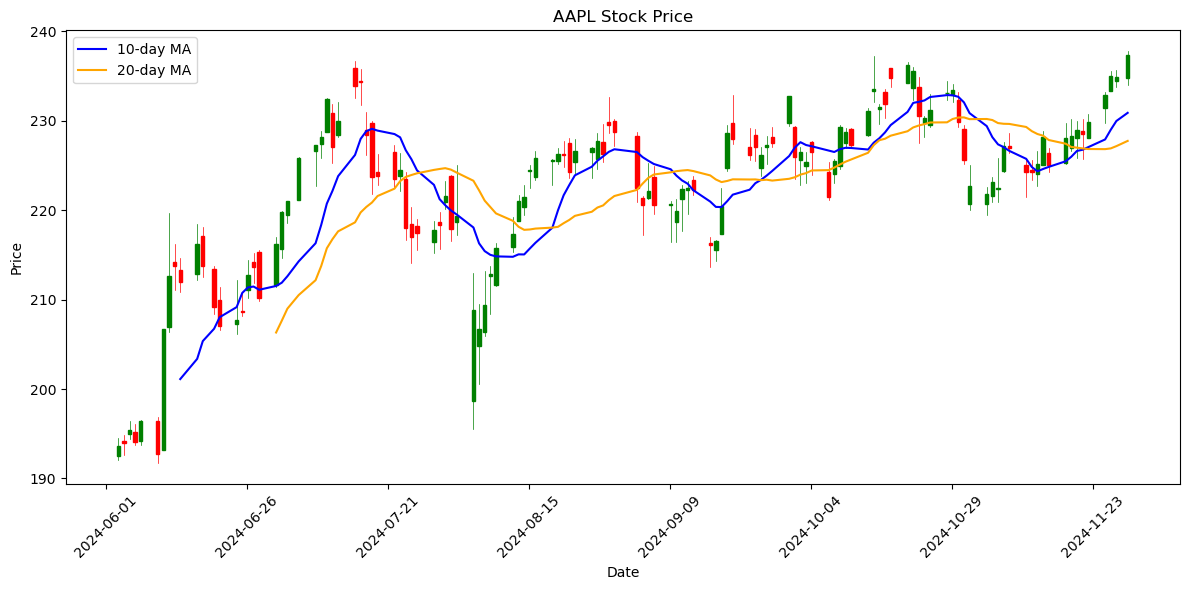

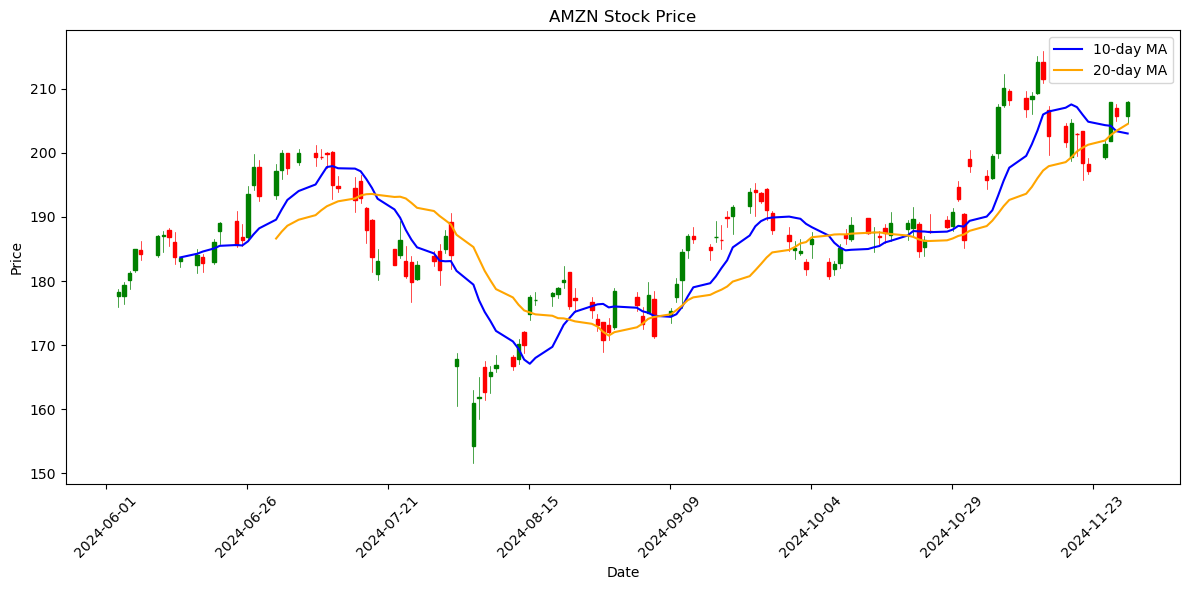

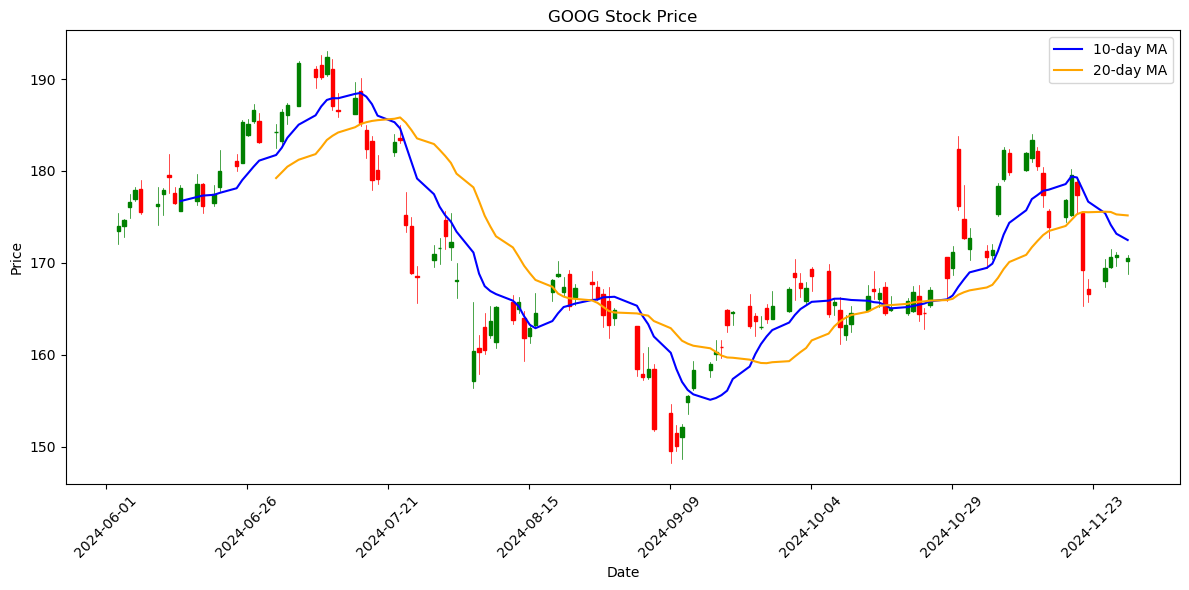

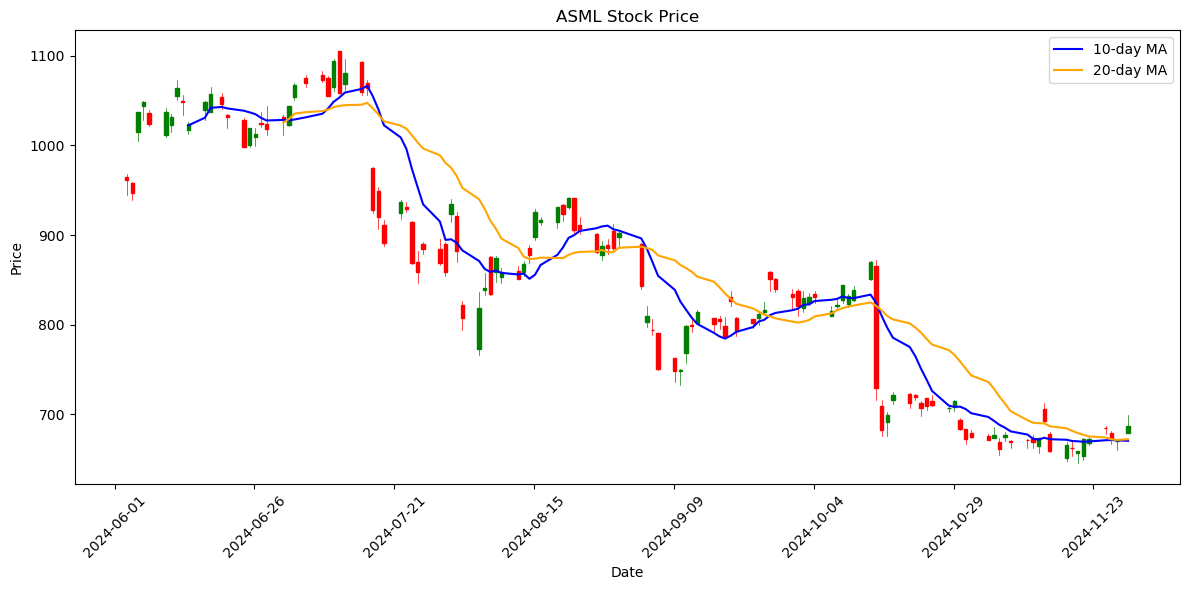

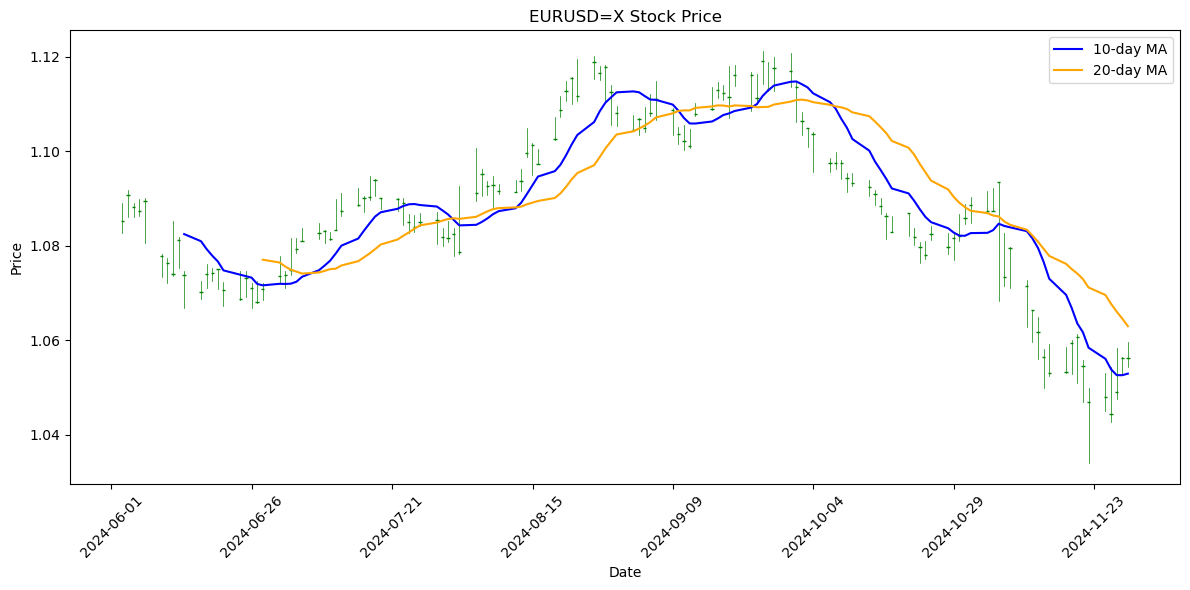

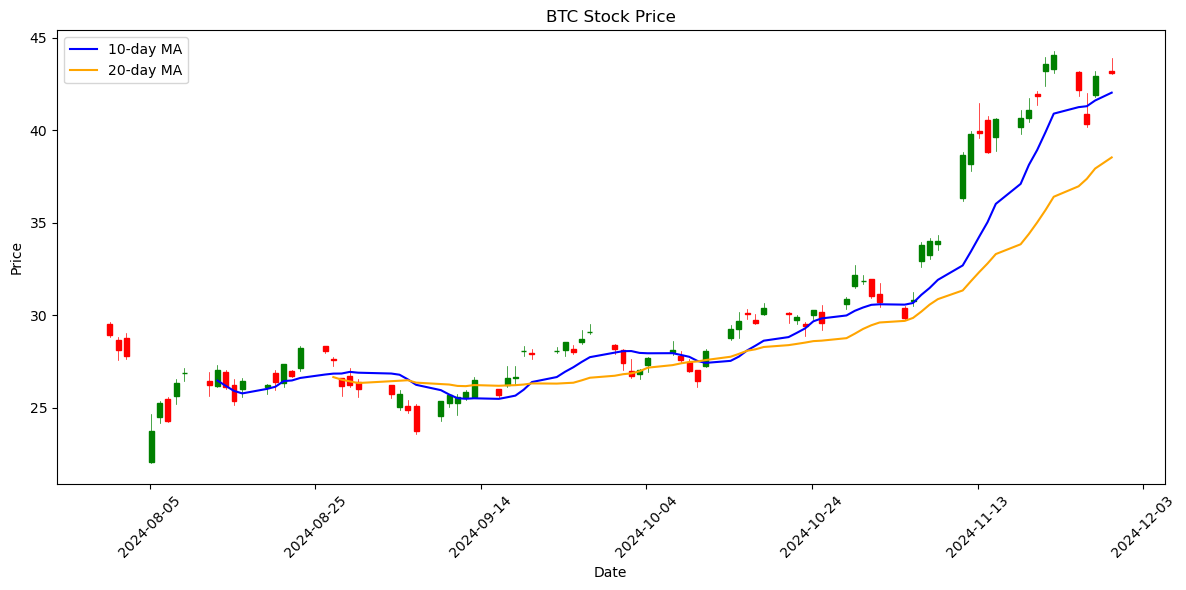

In [58]:
import yfinance as yf
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates

from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt
import plotly.graph_objects as go


Start = date.today() - timedelta(180)
Start.strftime("%Y-%m-%d")

End = date.today() + timedelta(2)
End.strftime("%Y-%m-%d")

stocks = ['MSFT', 'NVDA', 'AAPL', 'AMZN', 'GOOG', 'ASML', 'EURUSD=X', 'BTC']

# stock = 'NVDA'
for stock in stocks:
    data = yf.Ticker(stock).history(start=Start, end=End).reset_index()[["Date", "Open", "High", "Low", "Close", "Volume"]]

    # Calculate moving average
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['MA20'] = data['Close'].rolling(window=20).mean()

    # Convert date to number format for plotting
    data['Date'] = data['Date'].map(mpdates.date2num)

    # Create the candlestick chart
    fig, ax = plt.subplots(figsize=(12,6))
    candlestick_ohlc(ax, data[['Date', 'Open', 'High', 'Low', 'Close']].values, 
                    width=0.6, colorup='green', colordown='red')

    # Add moving average lines
    ax.plot(data['Date'], data['MA10'], color='blue', label='10-day MA')
    ax.plot(data['Date'], data['MA20'], color='orange', label='20-day MA')

    # Format the date axis
    ax.xaxis.set_major_formatter(mpdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock} Stock Price')
    plt.legend()

    plt.tight_layout()
    plt.show()
